In [33]:
### Linear Regression
# Method1: sklearn
# Method2: statsmodels.api
# Base Algorithm

### Multiple Features
# Method1: sklearn
# Method2: statsmodel.api
# Base Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep')

In [2]:
df = pd.read_csv('ex1data1.txt', names=['population','profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [16]:
# Get the data
cols = df.shape[1]
x = df.iloc[:, 0:cols-1]
y = df.iloc[:, cols-1:cols]
# Y = df.iloc[:,-1]    if using'-1', y will become series but not frames

## Method1: library_sklearn

In [30]:
from sklearn import linear_model

reg = linear_model.LinearRegression()  # set the model (Using SVD:Singular Value Decomposition)
reg.fit(x,y)                           # fit the model

w_sk = reg.coef_                       # coefficient
b_sk = reg.intercept_                  # intercept

## Method2: library_statsmodels.api

In [28]:
import statsmodels.api as sm

X = sm.add_constant(x)   # add '1' column
model = sm.OLS(y, X)     # set the model (Ordinary Least Squares)
results = model.fit()
print(results.summary())

b_sm = results.params[0]
w_sm = results.params[1]

# R-squared: indicates the proportion of the variance in the dependent variable that is explained by the independent variable(s) in a regression model.

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.02e-26
Time:                        14:09:27   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.0

In [79]:
print("w_sk = ", w_sk, "   w_sk's type:", type(w_sk))
print("w_sm = ", w_sm, "   w_sm's type:", type(w_sm))
print("type of sm: ", type(results.params))

w_sk =  [[1.19303364]]    w_sk's type: <class 'numpy.ndarray'>
w_sm =  1.193033644189594    w_sm's type: <class 'numpy.float64'>
type of sm:  <class 'pandas.core.series.Series'>


# Base Algorithm

## Cost Function
The cost function with parameter θ is defined as:
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
where,\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [45]:
def computeCost(X, y, theta):
    inner = np.power(X*theta.T-y, 2)
    return np.sum(inner)/(2*len(X))

In [46]:
### insert a column of "1" to vectorize the data, which refers to the b.(wx+b)
df.insert(0, 'ONE', 1)

In [47]:
# Initialization of data
cols = df.shape[1]
X = df.iloc[:, 0:cols-1]
y = df.iloc[:, cols-1:cols]

In [48]:
X.head()

,ONE,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [49]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [50]:
# Can also be accomplished with np.matrix

In [51]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [52]:
theta,X.shape,y.shape,theta.shape

(matrix([[0, 0]]), (97, 2), (97, 1), (1, 2))

In [53]:
computeCost(X,y,theta)

32.072733877455676

## Batch Gradient Descent
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
where, \\[\frac{\partial }{\partial {{\theta }_{j}}} J\left( \theta  \right)=\frac{1}{m} \sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}}}{x}^{(i)}\\]

In [54]:
def gradientDescent(X, y, theta, alpha, iters):  # alpha: learning rate, iters: iterations
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    # .ravel() can convert a matrix into one-dimensional, 
    # but the modification will affect the original matrix.

    for i in range(iters):
        error = (X*theta.T)-y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])   #.multiply():multiply each elements; .dot(): inner product
            temp[0, j] = theta[0,j] - (alpha/len(X) * np.sum(term))
            
        theta = temp
        cost[i]=computeCost(X, y, theta)
        
    return theta, cost

In [55]:
alpha = 0.01
iters = 1500

In [56]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [57]:
g

matrix([[-3.63029144,  1.16636235]])

In [58]:
cost

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

## Compare the result

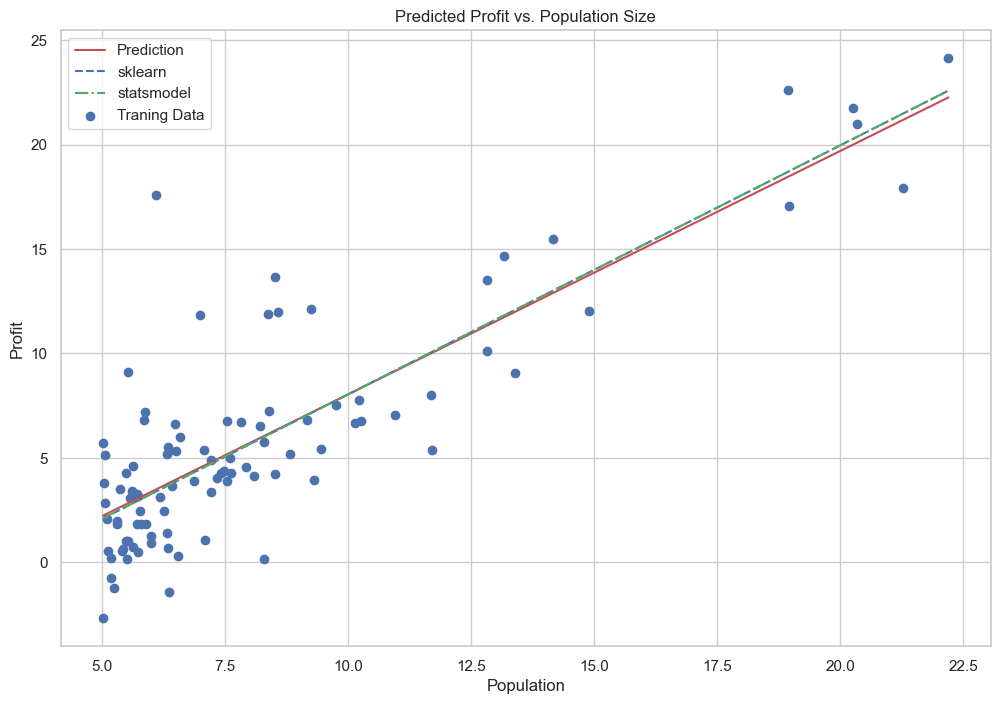

In [63]:
x = np.linspace(df.population.min(), df.population.max(), 100)
f = g[0,0] + g[0,1]*x
f_sk = float(b_sk) + float(w_sk)*x
f_sm = float(b_sm) + float(w_sm)*x

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r-', label='Prediction')   
ax.plot(x, f_sk, 'b--', label='sklearn')
ax.plot(x, f_sm, 'g-.', label='statsmodel')   
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2) 
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

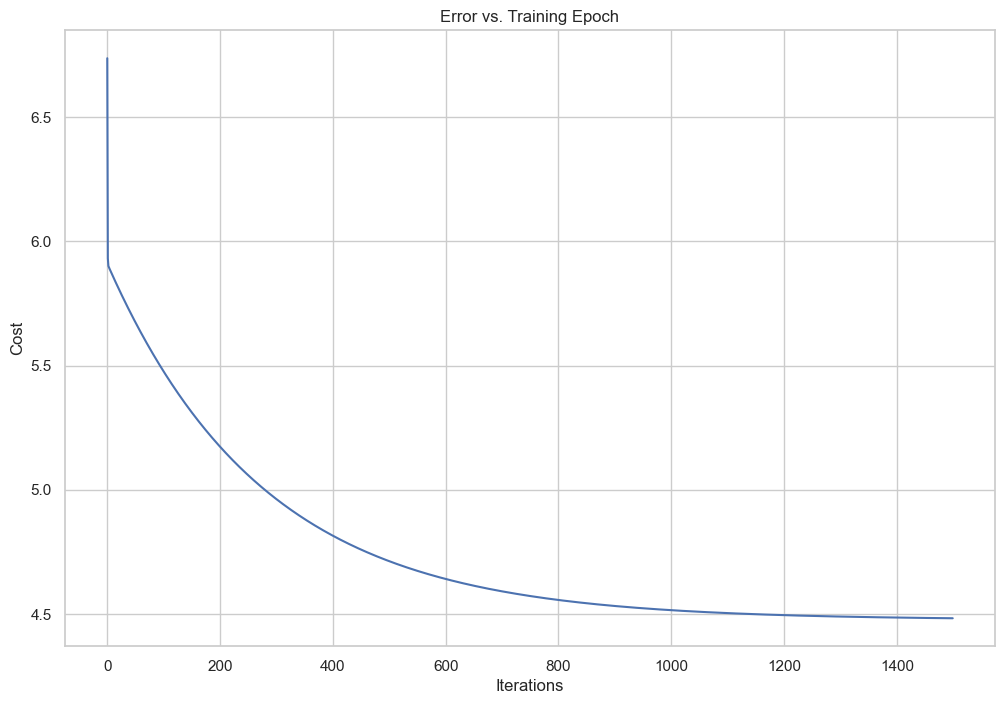

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch') 
plt.show()

# ---------- Multiple Features ----------

In [34]:
data2= pd.read_csv('ex1data2.txt',names=['square','bedrooms','price']) 
data2.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Engineering
$$
x_{n}=\frac{x_{n}-\mu_{n}}{\sigma_{n}}
$$
where, $\mu_n$ is the mean, and $\sigma_n$ is the standard deviation

In [35]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [36]:
cols = data2.shape[1]  
x2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

## Method1: library_sklearn

In [40]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x2, y2)

w2_sk = reg.coef_
b2_sk = reg.intercept_

print(w2_sk, b2_sk)

[[ 0.88476599 -0.05317882]] [-9.2685233e-17]


## Method2: library_statsmodels.api

In [43]:
import statsmodels.api as sm

X2 = sm.add_constant(x2)
model = sm.OLS(y2, X2)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.43e-13
Time:                        14:35:08   Log-Likelihood:                -35.158
No. Observations:                  47   AIC:                             76.32
Df Residuals:                      44   BIC:                             81.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.021e-17      0.077  -1.17e-15      1.0

In [26]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrixes and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)


0.13068670606095903

In [27]:
g2 #(b, w1, w2)

matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])

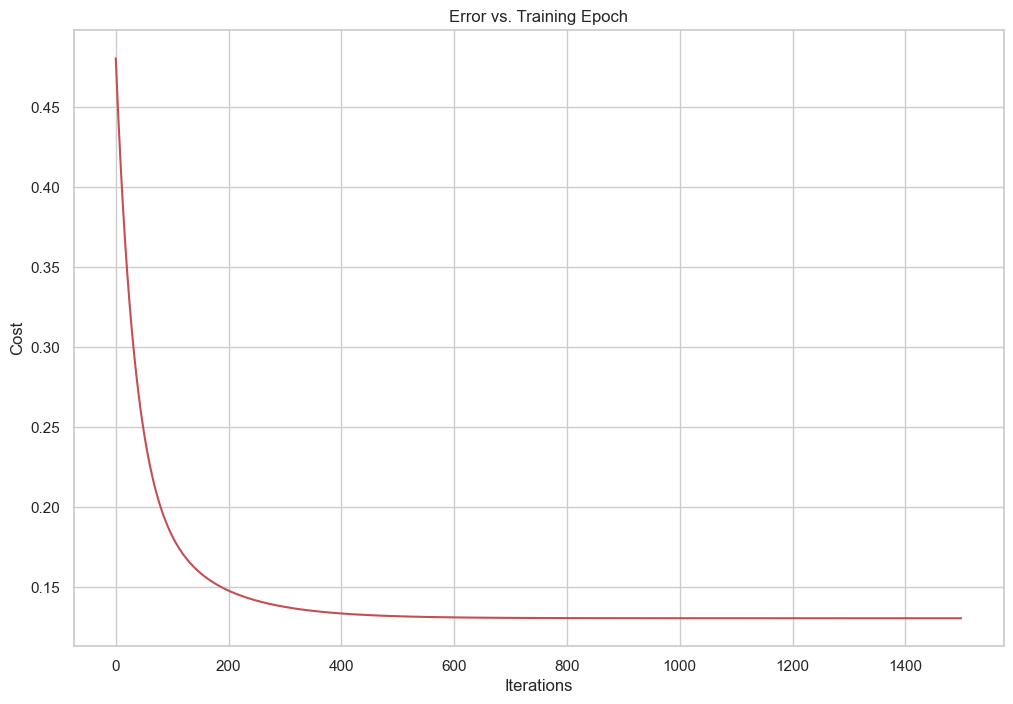

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()